In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = load_breast_cancer()

In [3]:
X = df.data
y = df.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
svc_model = SVC()

In [6]:
svc_model.fit(X_train, y_train)

SVC()

In [7]:
predict = svc_model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
def model_result(predictions):
  print(f'The accuracy score of the model is: {accuracy_score(y_test,predictions)}')

In [9]:
model_result(predict)

The accuracy score of the model is: 0.9385964912280702


In [10]:
classification_report(y_test, predict)

'              precision    recall  f1-score   support\n\n           0       0.91      0.89      0.90        35\n           1       0.95      0.96      0.96        79\n\n    accuracy                           0.94       114\n   macro avg       0.93      0.92      0.93       114\nweighted avg       0.94      0.94      0.94       114\n'

In [13]:
param_grid = {
    'C':[0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'gamma':['scale', 'auto'],
    'kernel':['linear']
}

In [15]:
grid_cv = GridSearchCV(svc_model, param_grid, refit=True, verbose=3, n_jobs=-1)

In [16]:
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']},
             verbose=3)

In [17]:
grid_cv.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [18]:
predict_grid = grid_cv.predict(X_test)

In [19]:
model_result(predict_grid)

The accuracy score of the model is: 0.9473684210526315


In [20]:
classification_report(y_test, predict_grid)

'              precision    recall  f1-score   support\n\n           0       0.87      0.97      0.92        35\n           1       0.99      0.94      0.96        79\n\n    accuracy                           0.95       114\n   macro avg       0.93      0.95      0.94       114\nweighted avg       0.95      0.95      0.95       114\n'

In [22]:
cm = confusion_matrix(predict_grid, y_test)
cm

array([[34,  5],
       [ 1, 74]])

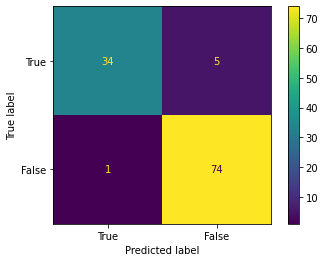

In [25]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True,False])
cm_display.plot()
plt.show()